In [2]:
#IMMPORING ALL THE NECESSARY FILES

import numpy as np
import sklearn
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#READING THE TWO FILES

fake = pd.read_csv('/Users/karmesh/Downloads/Fake.csv')
true = pd.read_csv('/Users/karmesh/Downloads/True.csv')

In [4]:
#PRINTING THE FIRST ROWS OF FAKE FILE

fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
#PRINTING THE FIRST ROWS OF TRUE FILE

true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
#GIVING LABELS TO THE FAKE AND TRUE AS 0 AND 1 RESPECTIVELY BUT NOTE THIS WOULD NOT BE USED IN TRAINING

fake['label'] = 0
true['label'] = 1

In [7]:
#CONCATINATE THE TWO FILES 

combined_df = pd.concat([fake, true], ignore_index=True)

In [8]:
#SHUFFLE THEM 

combined_df = combined_df.sample(frac=1).reset_index(drop=True)

In [9]:
#PRINTING THE HEAD OF THE DATASET AFTER COMBINING

print(combined_df.head())

                                               title  \
0   Elizabeth Warren Issues SCATHING Rebuke Of Re...   
1  Thousands at rallies demand Trump release tax ...   
2  Saudi agency says country targeted in cyber sp...   
3  DEMOCRAT MOCKS AMERICANS For Believing ‘Climat...   
4  Washington refocuses on tax; anti-tax activist...   

                                                text       subject  \
0  After the passing of conservative Supreme Cour...          News   
1  NEW YORK/WASHINGTON (Reuters) - Tens of thousa...  politicsNews   
2  LONDON/RIYADH (Reuters) - Saudi Arabian securi...     worldnews   
3  Not that it matters, but since it appears that...     left-news   
4  WASHINGTON (Reuters) - Congressional Republica...  politicsNews   

                 date  label  
0       March 9, 2016      0  
1     April 15, 2017       1  
2  November 20, 2017       1  
3         Jun 5, 2015      0  
4      July 26, 2017       1  


In [10]:
#PRINTING AS DATAFRAME

combined_df

,title,text,subject,date,label
0,Elizabeth Warren Issues SCATHING Rebuke Of Re...,After the passing of conservative Supreme Cour...,News,"March 9, 2016",0
1,Thousands at rallies demand Trump release tax ...,NEW YORK/WASHINGTON (Reuters) - Tens of thousa...,politicsNews,"April 15, 2017",1
2,Saudi agency says country targeted in cyber sp...,LONDON/RIYADH (Reuters) - Saudi Arabian securi...,worldnews,"November 20, 2017",1
3,DEMOCRAT MOCKS AMERICANS For Believing ‘Climat...,"Not that it matters, but since it appears that...",left-news,"Jun 5, 2015",0
4,Washington refocuses on tax; anti-tax activist...,WASHINGTON (Reuters) - Congressional Republica...,politicsNews,"July 26, 2017",1
...,...,...,...,...,...
44893,BLACK AMERICAN On How I Became A Republican: “...,***WARNING***GRAPHIC LanguageThis video contai...,politics,"Nov 3, 2016",0
44894,Czechs pin hopes on billionaire Babis to fix t...,PRAGUE (Reuters) - The traffic jams and roadwo...,worldnews,"October 12, 2017",1
44895,Chelsea Handler Gets The Last Word After RNC ...,There may be a few women out there who enjoy a...,News,"September 19, 2016",0
44896,HOLLYWOOD ACTRESS BRAGS About Her “Best Aborti...,"Plimpton, 46, who starred in The Goonies when ...",left-news,"Sep 6, 2017",0


In [11]:
#CHECKING IF NULL VALUES THERE IN DATASET OT NOT

combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [12]:
combined_df.describe()

,label
count,44898.000000
mean,0.477015
std,0.499477
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [13]:
combined_df.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [14]:
combined_df['title'].unique()

array([' Elizabeth Warren Issues SCATHING Rebuke Of Republican Incompetence On SCOTUS (VIDEO)',
       'Thousands at rallies demand Trump release tax returns',
       'Saudi agency says country targeted in cyber spying campaign', ...,
       ' Anchor Accidentally Announces Hillary Clinton’s Death On Air – Conspiracy Nuts Go WILD',
       'Czechs pin hopes on billionaire Babis to fix their country',
       ' Chelsea Handler Gets The Last Word After RNC Chair Attacks Hillary For Not Smiling (VIDEO)'],
      dtype=object)

CHECKING THE UNIQUE VALUES IN EACJ COLUMN

In [15]:
len(combined_df['title'].unique())

38729

In [16]:
combined_df['text'].unique()
len(combined_df['text'].unique())

38646

In [17]:
combined_df['subject'].unique()
len(combined_df['subject'].unique())

8

In [18]:
combined_df['date'].unique()
len(combined_df['date'].unique())

2397

PRE-PROCESSING OF THE DATASET

In [19]:
#PUTTING ALL THE CATAGORICAL DATA IN LOWERCASE

combined_df['title'] = combined_df['title'].str.lower()
combined_df['text'] = combined_df['text'].str.lower()

In [20]:
combined_df

,title,text,subject,date,label
0,elizabeth warren issues scathing rebuke of re...,after the passing of conservative supreme cour...,News,"March 9, 2016",0
1,thousands at rallies demand trump release tax ...,new york/washington (reuters) - tens of thousa...,politicsNews,"April 15, 2017",1
2,saudi agency says country targeted in cyber sp...,london/riyadh (reuters) - saudi arabian securi...,worldnews,"November 20, 2017",1
3,democrat mocks americans for believing ‘climat...,"not that it matters, but since it appears that...",left-news,"Jun 5, 2015",0
4,washington refocuses on tax; anti-tax activist...,washington (reuters) - congressional republica...,politicsNews,"July 26, 2017",1
...,...,...,...,...,...
44893,black american on how i became a republican: “...,***warning***graphic languagethis video contai...,politics,"Nov 3, 2016",0
44894,czechs pin hopes on billionaire babis to fix t...,prague (reuters) - the traffic jams and roadwo...,worldnews,"October 12, 2017",1
44895,chelsea handler gets the last word after rnc ...,there may be a few women out there who enjoy a...,News,"September 19, 2016",0
44896,hollywood actress brags about her “best aborti...,"plimpton, 46, who starred in the goonies when ...",left-news,"Sep 6, 2017",0


In [21]:
#REMOVING ANY PUNCHUATION MARKS

combined_df['title'] = combined_df['title'].str.replace('[^\w\s]', '')
combined_df['text'] = combined_df['text'].str.replace('[^\w\s]', '')

In [22]:
combined_df

,title,text,subject,date,label
0,elizabeth warren issues scathing rebuke of re...,after the passing of conservative supreme cour...,News,"March 9, 2016",0
1,thousands at rallies demand trump release tax ...,new york/washington (reuters) - tens of thousa...,politicsNews,"April 15, 2017",1
2,saudi agency says country targeted in cyber sp...,london/riyadh (reuters) - saudi arabian securi...,worldnews,"November 20, 2017",1
3,democrat mocks americans for believing ‘climat...,"not that it matters, but since it appears that...",left-news,"Jun 5, 2015",0
4,washington refocuses on tax; anti-tax activist...,washington (reuters) - congressional republica...,politicsNews,"July 26, 2017",1
...,...,...,...,...,...
44893,black american on how i became a republican: “...,***warning***graphic languagethis video contai...,politics,"Nov 3, 2016",0
44894,czechs pin hopes on billionaire babis to fix t...,prague (reuters) - the traffic jams and roadwo...,worldnews,"October 12, 2017",1
44895,chelsea handler gets the last word after rnc ...,there may be a few women out there who enjoy a...,News,"September 19, 2016",0
44896,hollywood actress brags about her “best aborti...,"plimpton, 46, who starred in the goonies when ...",left-news,"Sep 6, 2017",0


In [ ]:
#REMOVING OF LARGE NUMBER OF ROWS FOR THE EASYGONING WHILE IMPLEMENTING QUNATUM PHASE

In [23]:
combined_df = combined_df[:-2000]

In [24]:
combined_df


,title,text,subject,date,label
0,elizabeth warren issues scathing rebuke of re...,after the passing of conservative supreme cour...,News,"March 9, 2016",0
1,thousands at rallies demand trump release tax ...,new york/washington (reuters) - tens of thousa...,politicsNews,"April 15, 2017",1
2,saudi agency says country targeted in cyber sp...,london/riyadh (reuters) - saudi arabian securi...,worldnews,"November 20, 2017",1
3,democrat mocks americans for believing ‘climat...,"not that it matters, but since it appears that...",left-news,"Jun 5, 2015",0
4,washington refocuses on tax; anti-tax activist...,washington (reuters) - congressional republica...,politicsNews,"July 26, 2017",1
...,...,...,...,...,...
42893,ny mayor criticizes trump's closing public atr...,new york (reuters) - a showdown between new yo...,politicsNews,"June 1, 2016",1
42894,the “obama bounce”: ukip leader claims obama’s...,barack hussein obama has been in over his head...,left-news,"Jun 24, 2016",0
42895,dirty jobs’ mike rowe: great opportunities out...,,Government News,"Dec 27, 2016",0
42896,obama and union leaders sell out american work...,this story just proves what we ve been saying ...,left-news,"Apr 8, 2015",0


In [25]:
combined_df = combined_df[:-20000]

In [26]:
combined_df

,title,text,subject,date,label
0,elizabeth warren issues scathing rebuke of re...,after the passing of conservative supreme cour...,News,"March 9, 2016",0
1,thousands at rallies demand trump release tax ...,new york/washington (reuters) - tens of thousa...,politicsNews,"April 15, 2017",1
2,saudi agency says country targeted in cyber sp...,london/riyadh (reuters) - saudi arabian securi...,worldnews,"November 20, 2017",1
3,democrat mocks americans for believing ‘climat...,"not that it matters, but since it appears that...",left-news,"Jun 5, 2015",0
4,washington refocuses on tax; anti-tax activist...,washington (reuters) - congressional republica...,politicsNews,"July 26, 2017",1
...,...,...,...,...,...
22893,factbox: a report card on donald trump's first...,(reuters) - u.s. president donald trump took o...,politicsNews,"April 27, 2017",1
22894,trump jr.’s latest move proves that russia in...,proving that the biggest obstacle to his presi...,News,"July 10, 2017",0
22895,matchmaker merkel seeks awkward three-way embrace,berlin (reuters) - german chancellor angela me...,worldnews,"October 20, 2017",1
22896,tom cotton accepted $1 million from israel to...,how much money does it take for a foreign nati...,News,"January 4, 2016",0


In [27]:
combined_df = combined_df[:-10000]

In [28]:
combined_df

,title,text,subject,date,label
0,elizabeth warren issues scathing rebuke of re...,after the passing of conservative supreme cour...,News,"March 9, 2016",0
1,thousands at rallies demand trump release tax ...,new york/washington (reuters) - tens of thousa...,politicsNews,"April 15, 2017",1
2,saudi agency says country targeted in cyber sp...,london/riyadh (reuters) - saudi arabian securi...,worldnews,"November 20, 2017",1
3,democrat mocks americans for believing ‘climat...,"not that it matters, but since it appears that...",left-news,"Jun 5, 2015",0
4,washington refocuses on tax; anti-tax activist...,washington (reuters) - congressional republica...,politicsNews,"July 26, 2017",1
...,...,...,...,...,...
12893,senate advances bill to aid drug-dependent new...,washington (reuters) - a bipartisan bill desi...,politicsNews,"March 16, 2016",1
12894,angry dad confronts school board after finding...,we can t say enough great things about this da...,left-news,"May 5, 2017",0
12895,nra board member ted nugent just encouraged h...,stochastic terrorism is a term that means to u...,News,"May 11, 2016",0
12896,and so it begins…inspired by gay marriage ruli...,"well, that didn t take long. look for the firs...",politics,"Jul 2, 2015",0


In [29]:
combined_df = combined_df[:-3898]

In [30]:
#HAVING EXACTLY 9000 ROWS

combined_df

,title,text,subject,date,label
0,elizabeth warren issues scathing rebuke of re...,after the passing of conservative supreme cour...,News,"March 9, 2016",0
1,thousands at rallies demand trump release tax ...,new york/washington (reuters) - tens of thousa...,politicsNews,"April 15, 2017",1
2,saudi agency says country targeted in cyber sp...,london/riyadh (reuters) - saudi arabian securi...,worldnews,"November 20, 2017",1
3,democrat mocks americans for believing ‘climat...,"not that it matters, but since it appears that...",left-news,"Jun 5, 2015",0
4,washington refocuses on tax; anti-tax activist...,washington (reuters) - congressional republica...,politicsNews,"July 26, 2017",1
...,...,...,...,...,...
8995,"under trump, future of u.s. nuclear arsenal sl...",juliett-01 missile alert facility (reuters) - ...,politicsNews,"September 14, 2017",1
8996,even mitch mcconnell is beginning to turn on ...,donald trump s muslim ban is proving to be a l...,News,"February 5, 2017",0
8997,foreign born alien with 4 felonies arrested fo...,the consequences of a failure to control immig...,left-news,"Jul 15, 2015",0
8998,new analysis finds significant voting anomali...,it turns out that there are a few new reasons ...,News,"December 1, 2016",0


In [33]:
#REMOVING THE HTML TAGS,punctuation marks and other irrelevant symbols
import re


def remove_noise(text):
    text = re.sub(r'<[^>]+>', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    return text

# Create a copy of the DataFrame to avoid the SettingWithCopyWarning
combined_df_cleaned = combined_df.copy()

# Apply the remove_noise function to the 'title' and 'text' columns of the copied DataFrame
combined_df_cleaned['title'] = combined_df_cleaned['title'].apply(remove_noise)
combined_df_cleaned['text'] = combined_df_cleaned['text'].apply(remove_noise)

# Display the updated DataFrame
print(combined_df_cleaned.head())



                                               title  \
0   elizabeth warren issues scathing rebuke of re...   
1  thousands at rallies demand trump release tax ...   
2  saudi agency says country targeted in cyber sp...   
3  democrat mocks americans for believing climate...   
4  washington refocuses on tax antitax activist s...   

                                                text       subject  \
0  after the passing of conservative supreme cour...          News   
1  new yorkwashington reuters  tens of thousands ...  politicsNews   
2  londonriyadh reuters  saudi arabian security o...     worldnews   
3  not that it matters but since it appears that ...     left-news   
4  washington reuters  congressional republicans ...  politicsNews   

                 date  label  
0       March 9, 2016      0  
1     April 15, 2017       1  
2  November 20, 2017       1  
3         Jun 5, 2015      0  
4      July 26, 2017       1  


In [34]:
# Importing necessary libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function for text normalization with lemmatization
def normalize_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]
    
    # Perform lemmatization
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    
    # Join the tokens back into a single string
    normalized_text = ' '.join(lemmatized_tokens)
    
    return normalized_text

# Apply the normalize_text function to the 'title' and 'text' columns of the DataFrame
combined_df_cleaned['title'] = combined_df_cleaned['title'].apply(normalize_text)
combined_df_cleaned['text'] = combined_df_cleaned['text'].apply(normalize_text)

# Display the updated DataFrame
combined_df_cleaned.head()


[nltk_data] Downloading package punkt to /Users/karmesh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/karmesh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/karmesh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,title,text,subject,date,label
0,elizabeth warren issue scathing rebuke republi...,passing conservative supreme court justice ant...,News,"March 9, 2016",0
1,thousand rally demand trump release tax return,new yorkwashington reuters ten thousand people...,politicsNews,"April 15, 2017",1
2,saudi agency say country targeted cyber spying...,londonriyadh reuters saudi arabian security of...,worldnews,"November 20, 2017",1
3,democrat mock american believing climate chang...,matter since appears one read bill probably un...,left-news,"Jun 5, 2015",0
4,washington refocuses tax antitax activist see ...,washington reuters congressional republican ra...,politicsNews,"July 26, 2017",1


In [35]:
#ADDING THE TOKENIZING COLUMN SEPERATELY

# Importing necessary library
from nltk.tokenize import word_tokenize

# Define a function for tokenization
def tokenize_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    return tokens

# Apply the tokenize_text function to the 'title' and 'text' columns of the DataFrame
combined_df_cleaned['title_tokens'] = combined_df_cleaned['title'].apply(tokenize_text)
combined_df_cleaned['text_tokens'] = combined_df_cleaned['text'].apply(tokenize_text)

# Display the updated DataFrame
combined_df_cleaned.head()


,title,text,subject,date,label,title_tokens,text_tokens
0,elizabeth warren issue scathing rebuke republi...,passing conservative supreme court justice ant...,News,"March 9, 2016",0,"[elizabeth, warren, issue, scathing, rebuke, r...","[passing, conservative, supreme, court, justic..."
1,thousand rally demand trump release tax return,new yorkwashington reuters ten thousand people...,politicsNews,"April 15, 2017",1,"[thousand, rally, demand, trump, release, tax,...","[new, yorkwashington, reuters, ten, thousand, ..."
2,saudi agency say country targeted cyber spying...,londonriyadh reuters saudi arabian security of...,worldnews,"November 20, 2017",1,"[saudi, agency, say, country, targeted, cyber,...","[londonriyadh, reuters, saudi, arabian, securi..."
3,democrat mock american believing climate chang...,matter since appears one read bill probably un...,left-news,"Jun 5, 2015",0,"[democrat, mock, american, believing, climate,...","[matter, since, appears, one, read, bill, prob..."
4,washington refocuses tax antitax activist see ...,washington reuters congressional republican ra...,politicsNews,"July 26, 2017",1,"[washington, refocuses, tax, antitax, activist...","[washington, reuters, congressional, republica..."


In [37]:
#CONVERTING CATAGORICAL DATA TO NUMERICAL DATA BASED ON JUST FREQUENCY OF WORDS


from sklearn.feature_extraction.text import CountVectorizer

# Convert the list of tokens into a single string for each document
combined_df_cleaned['combined_tokens_str'] = combined_df_cleaned['combined_tokens'].apply(lambda x: ' '.join(x))

# Convert tokenized text data into numerical vectors using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(combined_df_cleaned['combined_tokens_str'])

# Display the shape of the resulting matrix
print("Shape of the vectorized data:", X.shape)


Shape of the vectorized data: (9000, 90070)


In [43]:
#CONVERTING CATAGORICAL DATA TO NUMERICAL DATA BASED ON JUST FREQUENCY OF WORDS AND HOW UNIQUE THEY ARE USING TFIDF METHOD

from sklearn.feature_extraction.text import TfidfVectorizer

# Convert the list of tokens into a single string for each document
combined_df_cleaned['combined_tokens_str'] = combined_df_cleaned['combined_tokens'].apply(lambda x: ' '.join(x))

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the text data
X_tfidf = tfidf_vectorizer.fit_transform(combined_df_cleaned['combined_tokens_str'])

print("Shape of the TF-IDF vectorized data:", X_tfidf.shape)


Shape of the TF-IDF vectorized data: (9000, 90070)


In [44]:
#APPLYING PRINCIPLE COMPONENT ANALYSIS ON TFIDF COMBINED VECTORIZATION


from sklearn.decomposition import PCA

# Define the number of components for PCA
n_components = 20  


pca = PCA(n_components=n_components)

# Fit PCA to the TF-IDF vectorized data
X_pca = pca.fit_transform(X_tfidf.toarray())


print("Shape of the PCA-transformed data:", X_pca.shape)



Shape of the PCA-transformed data: (9000, 20)


In [47]:
import numpy as np

def angle_encoding(data):
    """
    Angle encoding of data vectors into quantum states.
    
    Args:
        data (numpy.ndarray): Array of shape (n_samples, n_features) containing numerical vectors.
        
    Returns:
        numpy.ndarray: Array of shape (n_samples, n_features + 1) containing quantum states.
    """
    n_samples, n_features = data.shape
    encoded_data = np.zeros((n_samples, n_features + 1))
    
    for i in range(n_samples):
        norm = np.linalg.norm(data[i])
        encoded_data[i, :-1] = data[i] / norm
        encoded_data[i, -1] = np.arccos(data[i, 0] / norm) * np.sign(data[i, 1])  # Encoding angle
    
    return encoded_data

# Example usage:
encoded_data = angle_encoding(X_pca)

# Check if encoded data is in quantum states
print("Shape of the encoded data:", encoded_data.shape)


Shape of the encoded data: (9000, 21)


In [51]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test = train_test_split(encoded_data, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Shape of the training set:", X_train.shape)
print("Shape of the testing set:", X_test.shape)


Shape of the training set: (7200, 21)
Shape of the testing set: (1800, 21)


In [50]:
encoded_data

array([[ 2.23401049e-01, -2.95740938e-02,  4.60638905e-01, ...,
        -1.88849382e-02,  2.18922500e-01, -1.34549401e+00],
       [ 3.47117339e-01,  1.50300268e-01,  2.42378187e-01, ...,
         9.43098713e-02,  3.07558920e-02,  1.21630076e+00],
       [-4.86588137e-01,  1.49096867e-01, -1.09273992e-01, ...,
         2.50102007e-01,  2.26881516e-01,  2.07897643e+00],
       ...,
       [-4.47665801e-01, -3.63595305e-01, -6.39527637e-02, ...,
         3.28047591e-01, -3.52118286e-01, -2.03494958e+00],
       [-1.57640042e-01, -5.06955963e-01,  1.20104518e-01, ...,
        -3.35043604e-03,  8.23163117e-02, -1.72909668e+00],
       [-2.59806924e-01,  2.82233371e-01,  8.15989414e-04, ...,
         5.23774589e-02,  3.16291602e-02,  1.83361858e+00]])

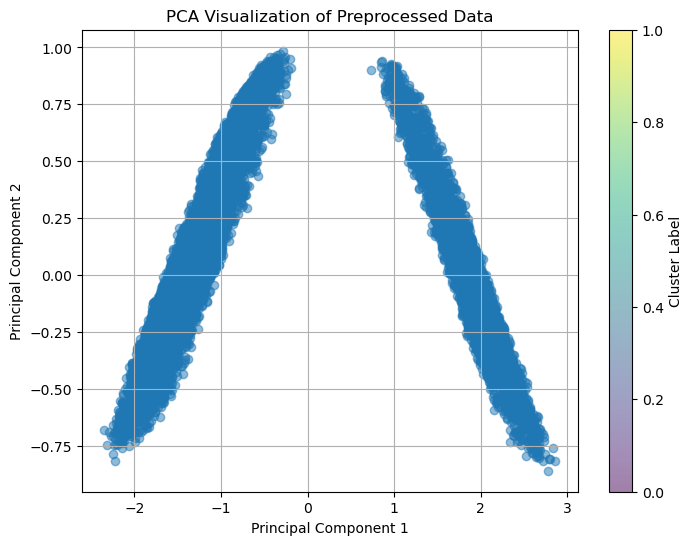

In [55]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Initialize PCA with 2 components for visualization
pca = PCA(n_components=2)

# Fit PCA to the encoded data
X_pca = pca.fit_transform(encoded_data)

# Visualize the PCA-transformed data
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.title('PCA Visualization of Preprocessed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()


In [56]:
import numpy as np

def initialize_centroids(data, k):
    """
    Initialize cluster centroids randomly.

    Parameters:
    - data: The dataset with shape (n_samples, n_features).
    - k: The number of clusters.

    Returns:
    - centroids: An array of shape (k, n_features) representing the initial cluster centroids.
    """
    n_samples, n_features = data.shape
    centroids = np.zeros((k, n_features))

    # Randomly select k data points as initial centroids
    random_indices = np.random.choice(n_samples, k, replace=False)
    centroids = data[random_indices]

    return centroids

# Example usage:
data = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]])
k = 2
centroids = initialize_centroids(data, k)
print("Initial centroids:")
print(centroids)


Initial centroids:
[[1 2]
 [3 4]]


In [72]:
import numpy as np
from qiskit import QuantumCircuit, Aer, transpile, assemble

def encode_quantum_states(data_points, centroids):
    """
    Encode data points and centroids into quantum states using amplitude encoding.
    
    Args:
        data_points (numpy.ndarray): Array of shape (n_data_points, n_features) containing data points.
        centroids (numpy.ndarray): Array of shape (n_centroids, n_features) containing centroids.
        
    Returns:
        list: List of QuantumCircuit objects representing the encoded quantum states.
    """
    # Normalize data points and centroids
    max_val = max(np.max(np.abs(data_points)), np.max(np.abs(centroids)))
    norm_data_points = data_points / max_val
    norm_centroids = centroids / max_val
    
    # Initialize an empty list to store encoded quantum states
    encoded_states = []
    
    # Encode data points
    for point in norm_data_points:
        qc = QuantumCircuit(len(point))
        for i, component in enumerate(point):
            angle = np.arcsin(np.sqrt(component))
            qc.ry(2 * angle, i)
        encoded_states.append(qc)
    
    # Encode centroids
    for centroid in norm_centroids:
        qc = QuantumCircuit(len(centroid))
        for i, component in enumerate(centroid):
            angle = np.arcsin(np.sqrt(component))
            qc.ry(2 * angle, i)
        encoded_states.append(qc)
    
    return encoded_states


# Example usage:
# Generate random data points and centroids
data_points = np.random.rand(5, 2)  # Example data points
centroids = np.random.rand(2, 2)     # Example centroids

# Encode data points and centroids into quantum states
encoded_states = encode_quantum_states(data_points, centroids)


In [73]:
print("Shape of data point:", encoded_data.shape)
print("Data point:", encoded_data)


Shape of data point: (9000, 21)
Data point: [[ 2.23401049e-01 -2.95740938e-02  4.60638905e-01 ... -1.88849382e-02
   2.18922500e-01 -1.34549401e+00]
 [ 3.47117339e-01  1.50300268e-01  2.42378187e-01 ...  9.43098713e-02
   3.07558920e-02  1.21630076e+00]
 [-4.86588137e-01  1.49096867e-01 -1.09273992e-01 ...  2.50102007e-01
   2.26881516e-01  2.07897643e+00]
 ...
 [-4.47665801e-01 -3.63595305e-01 -6.39527637e-02 ...  3.28047591e-01
  -3.52118286e-01 -2.03494958e+00]
 [-1.57640042e-01 -5.06955963e-01  1.20104518e-01 ... -3.35043604e-03
   8.23163117e-02 -1.72909668e+00]
 [-2.59806924e-01  2.82233371e-01  8.15989414e-04 ...  5.23774589e-02
   3.16291602e-02  1.83361858e+00]]


In [74]:
import numpy as np

def angle_encoding(data):
    """
    Angle encoding of data vectors into quantum states.
    
    Args:
        data (numpy.ndarray): Array of shape (n_samples, n_features) containing numerical vectors.
        
    Returns:
        numpy.ndarray: Array of shape (n_samples, n_features + 1) containing quantum states.
    """
    n_samples, n_features = data.shape
    encoded_data = np.zeros((n_samples, n_features + 1))
    
    for i in range(n_samples):
        norm = np.linalg.norm(data[i])
        encoded_data[i, :-1] = data[i] / norm
        encoded_data[i, -1] = np.arccos(data[i, 0] / norm) * np.sign(data[i, 1])  # Encoding angle
    
    return encoded_data


[[0.4375     0.41503906]
 [0.39160156 0.37792969]
 [0.45507812 0.40820312]
 [0.44628906 0.39160156]]


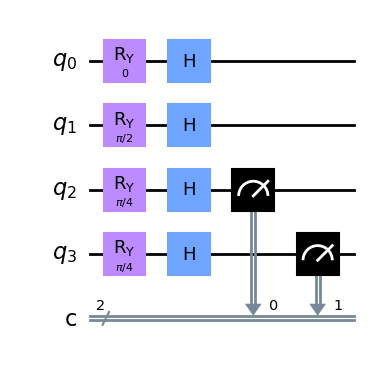

In [109]:
from qiskit import QuantumCircuit, transpile, Aer, assemble
from qiskit import QuantumCircuit, transpile, Aer
from qiskit.visualization import plot_histogram
from qiskit.visualization import circuit_drawer
import numpy as np

def encode_data_point(data_point):
    """
    Encode a single data point into a quantum state.
    """
    num_qubits = len(data_point)
    qc = QuantumCircuit(num_qubits)
    for i, value in enumerate(data_point):
        angle = np.arcsin(np.sqrt(value))
        qc.ry(angle, i)
    return qc

def encode_centroid(centroid):
    """
    Encode a centroid into a quantum state.
    """
    num_qubits = len(centroid)
    qc = QuantumCircuit(num_qubits)
    for i, value in enumerate(centroid):
        angle = np.arcsin(np.sqrt(value))
        qc.ry(angle, i)
    return qc

def calculate_distances_quantum(encoded_data_points, encoded_centroids):
    """
    Calculate distances between encoded data points and centroids using quantum operations.
    """
    num_data_points = len(encoded_data_points)
    num_centroids = len(encoded_centroids)
    distances = np.zeros((num_data_points, num_centroids))
    
    qasm_sim = Aer.get_backend('qasm_simulator')
    
    for i, data_point in enumerate(encoded_data_points):
        for j, centroid in enumerate(encoded_centroids):
            qc = QuantumCircuit(len(data_point) + len(centroid), len(data_point))
            qc.compose(data_point, range(len(data_point)), inplace=True)
            qc.compose(centroid, range(len(data_point), len(data_point) + len(centroid)), inplace=True)
            
            # Apply Hadamard gates to create superposition before measurement
            qc.h(range(len(data_point) + len(centroid)))
            
            qc.measure(range(len(data_point), len(data_point) + len(centroid)), range(len(data_point)))
            
            # Draw the circuit
            qc.draw(output='mpl')
            
            t_qc = transpile(qc, qasm_sim)
            result = qasm_sim.run(t_qc).result()
            counts = result.get_counts(qc)
            
            # Calculate the distance based on the measurement outcome probabilities
            distance = 0
            for outcome, count in counts.items():
                probability = count / sum(counts.values())
                distance += probability * int(outcome, 2)
            distances[i][j] = distance
            
    return distances



# Example usage:
data_points = [[0, 1], [1, 0], [0, 0], [1, 1]]  # Example data points
centroids = [[0.5, 0.5], [0.25, 0.75]]  # Example centroids

encoded_data_points = [encode_data_point(data_point) for data_point in data_points]

encoded_centroids = [encode_centroid(centroid) for centroid in centroids]

distances = calculate_distances_quantum(encoded_data_points, encoded_centroids)
print(distances)

# Visualize the circuit for the first data point and centroid
qc = QuantumCircuit(len(encoded_data_points[0]) + len(encoded_centroids[0]), len(encoded_data_points[0]))
qc.compose(encoded_data_points[0], range(len(encoded_data_points[0])), inplace=True)
qc.compose(encoded_centroids[0], range(len(encoded_data_points[0]), len(encoded_data_points[0]) + len(encoded_centroids[0])), inplace=True)
qc.h(range(len(encoded_data_points[0]) + len(encoded_centroids[0])))
qc.measure(range(len(encoded_data_points[0]), len(encoded_data_points[0]) + len(encoded_centroids[0])), range(len(encoded_data_points[0])))

# Draw the circuit
qc.draw(output='mpl')


In [76]:
# Calculate distances between data points and centroids
distances = calculate_distances_quantum(encoded_data_points, encoded_centroids)

# Assign data points to clusters based on nearest centroid
cluster_assignments = np.argmin(distances, axis=1)

print("Cluster assignments for data points:")
print(cluster_assignments)


Cluster assignments for data points:
[1 1 1 1]


In [77]:
print("Distances between data points and centroids:")
print(distances)

Distances between data points and centroids:
[[0.45117188 0.37207031]
 [0.421875   0.40234375]
 [0.41015625 0.36621094]
 [0.42089844 0.39648438]]


In [78]:
# Verify the index of the nearest centroid for each data point
nearest_centroids = np.argmin(distances, axis=1)

print("Nearest centroids for each data point:")
print(nearest_centroids)


Nearest centroids for each data point:
[1 1 1 1]


In [79]:
print("Data points:")
print(data_points)

print("Centroids:")
print(centroids)

print("Distances between data points and centroids:")
print(distances)


Data points:
[[0, 1], [1, 0], [0, 0], [1, 1]]
Centroids:
[[0.5, 0.5], [0.25, 0.75]]
Distances between data points and centroids:
[[0.45117188 0.37207031]
 [0.421875   0.40234375]
 [0.41015625 0.36621094]
 [0.42089844 0.39648438]]


In [80]:
import numpy as np

# Distances between data points and centroids
distances = np.array([[0.45117188, 0.37207031],
                      [0.421875,    0.40234375],
                      [0.41015625,  0.36621094],
                      [0.42089844,  0.39648438]])

# Assign data points to clusters based on nearest centroid
cluster_assignments = np.argmin(distances, axis=1)

print("Cluster assignments for data points:")
print(cluster_assignments)


Cluster assignments for data points:
[1 1 1 1]


In [81]:
import numpy as np

# Distances between data points and centroids
distances = np.array([[0.45117188, 0.37207031],
                      [0.421875,    0.40234375],
                      [0.41015625,  0.36621094],
                      [0.42089844,  0.39648438]])

# Verify the index of the nearest centroid for each data point
nearest_centroids = np.argmin(distances, axis=1)

print("Nearest centroids for each data point:")
print(nearest_centroids)


Nearest centroids for each data point:
[1 1 1 1]


In [110]:
from sklearn.cluster import KMeans

# Assuming you have defined and trained your K-means model
kmeans = KMeans(n_clusters=2, n_init=10)  # Example: 2 clusters
cluster_assignments = kmeans.fit_predict(X_train)

# Calculate silhouette score using cluster assignments for training data
silhouette_avg = silhouette_score(X_train, cluster_assignments)

print("Silhouette Score:", silhouette_avg)



Silhouette Score: 0.5884662888550394
